### Predicting Sun Radiation with Prophet
In this notebook, we are going to predict solar radiation with Facebook Prophet, which is an automated procedure used to forecast timeseries.
#### About this dataset
This NASA dataset is composed by meteorological data from the HI-SEAS weather station from four months (September through December 2016). It contains data about metereological variables such as humidity and temperature, but for the purposes of this post we're only interested in solar radiation, measured in watts per meter^2.

In [53]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
plt.style.use('fivethirtyeight')

In [54]:
df = pd.read_csv('SolarPrediction.csv')

# translating UNIXTime stamps into datetime variables
df['Date'] = pd.to_datetime(df['UNIXTime'],unit='s')

# creating dataframe only with the columns cointaining the variables we're interested
radiation_df = df[['Date', 'Radiation']]

# renaming the columns the way Prophet requires
radiation_df.rename(columns={'Date': 'ds', 'Radiation': 'y'}, inplace=True)

# setting index to date so we can slice 
radiation_df.set_index('ds', inplace=True)
radiation_df=radiation_df.loc['2016-09-01':'2016-11-15']

# resetting index
radiation_df.reset_index(inplace=True)
radiation_df

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
0,2016-09-30 09:55:26,1.21
1,2016-09-30 09:50:23,1.21
2,2016-09-30 09:45:26,1.23
3,2016-09-30 09:40:21,1.21
4,2016-09-30 09:35:24,1.17
...,...,...
20428,2016-11-01 10:25:18,1.26
20429,2016-11-01 10:20:19,1.31
20430,2016-11-01 10:15:20,1.30
20431,2016-11-01 10:10:18,1.31


In [6]:
# creating and fitting model 
model = Prophet()
model.fit(radiation_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [14]:
# creating dataframe with future predictions
future = model.make_future_dataframe(periods=120, freq='h', include_history=True)
future.tail()

,ds
20548,2016-11-20 19:55:02
20549,2016-11-20 20:55:02
20550,2016-11-20 21:55:02
20551,2016-11-20 22:55:02
20552,2016-11-20 23:55:02


In [8]:
# predicting
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
20548,2016-11-20 19:55:02,225.322146,487.036314,886.265331,161.874064,296.104232,470.308973,470.308973,470.308973,472.993469,472.993469,472.993469,-2.684497,-2.684497,-2.684497,0.0,0.0,0.0,695.631119
20549,2016-11-20 20:55:02,225.298694,610.980657,991.188001,161.352187,296.796816,578.892414,578.892414,578.892414,580.568060,580.568060,580.568060,-1.675646,-1.675646,-1.675646,0.0,0.0,0.0,804.191108
20550,2016-11-20 21:55:02,225.275242,625.215761,1022.188060,159.809121,297.704411,591.886144,591.886144,591.886144,592.543070,592.543070,592.543070,-0.656926,-0.656926,-0.656926,0.0,0.0,0.0,817.161386
20551,2016-11-20 22:55:02,225.251790,555.319469,961.390366,159.510150,299.342328,528.578814,528.578814,528.578814,528.212516,528.212516,528.212516,0.366298,0.366298,0.366298,0.0,0.0,0.0,753.830604
20552,2016-11-20 23:55:02,225.228338,453.426965,843.984426,159.891080,299.946016,412.835114,412.835114,412.835114,411.446759,411.446759,411.446759,1.388355,1.388355,1.388355,0.0,0.0,0.0,638.063452


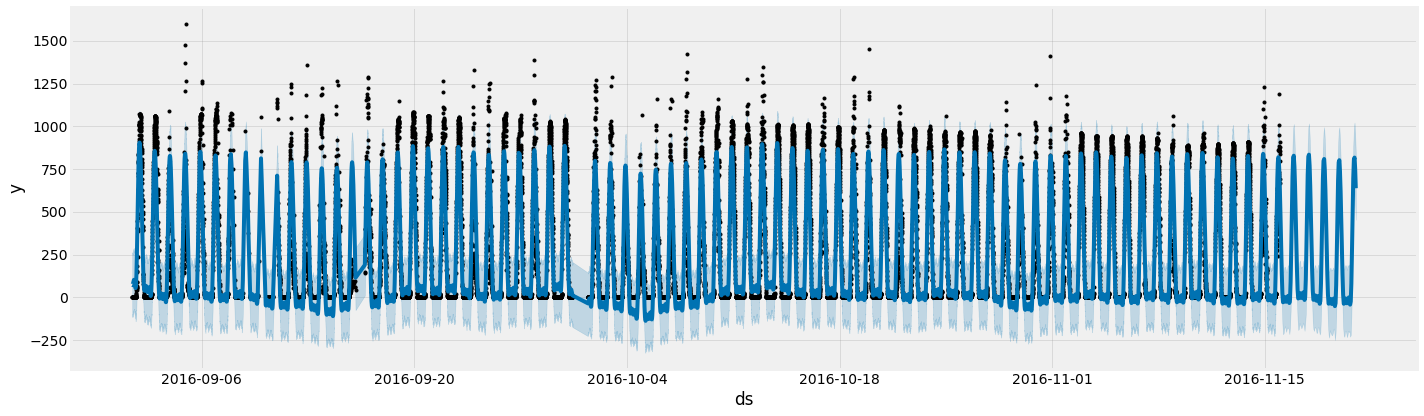

In [34]:
# plotting the results
#model.plot(forecast, figsize=(20,8)

#plot_plotly(model, forecast)

fig = model.plot(forecast, figsize=(20,6))
plt.show()

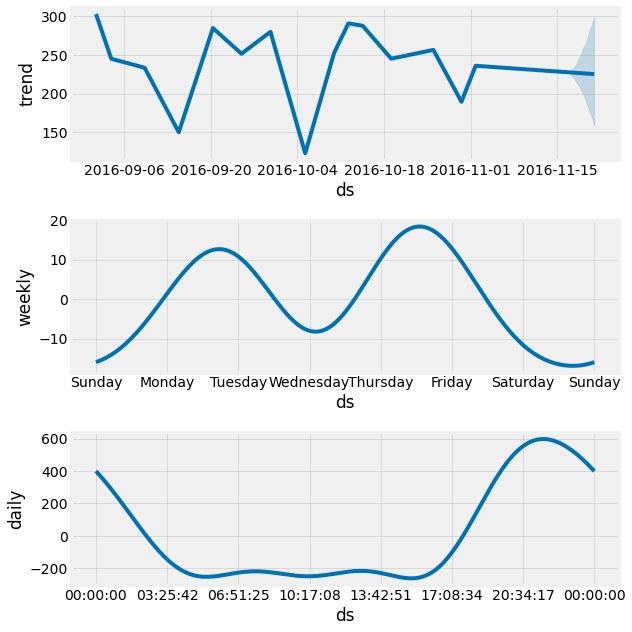

In [13]:
fig2 = model.plot_components(forecast)

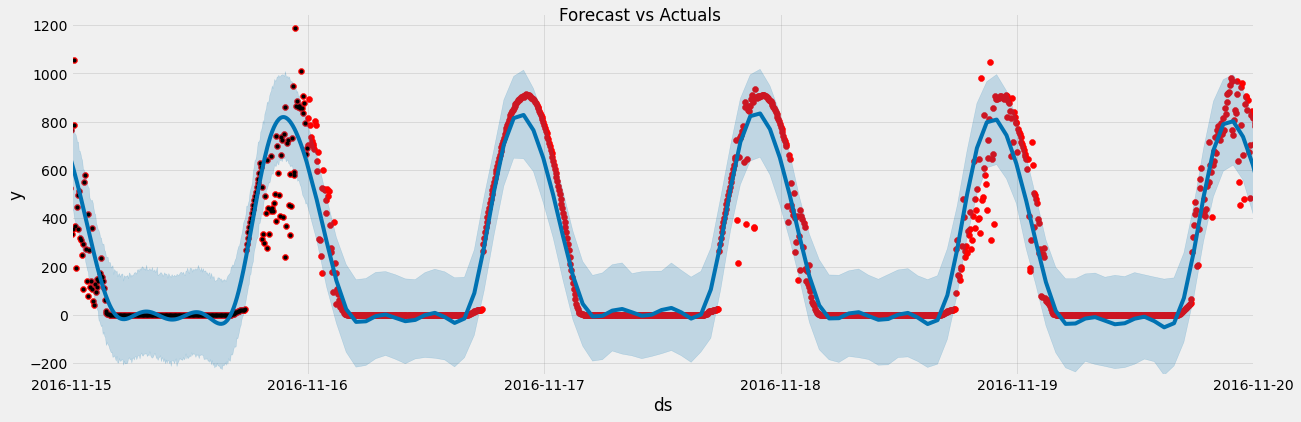

In [36]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(18)
ax.scatter(df['Date'], df['Radiation'], color='r')
fig = model.plot(forecast, ax=ax)
ax.set_xbound(lower='2016-11-15',
              upper='2016-11-20')
ax.set_ylim(-250, 1250)
plot = plt.suptitle('Forecast vs Actuals')